# 1. Exploratory Data Analysis (EDA)


این نوت‌بوک برای تحلیل اولیه دیتا جهت پروژه‌ی تشخیص موضوع کامنت‌ها است.

در این نوت‌بوک:

- دیتاست را لود می‌کنیم  
- ساختار و کیفیت دیتا را بررسی می‌کنیم  
- توزیع لیبل‌ها را بررسی می‌کنیم  
- طول جملات را تحلیل می‌کنیم  
- نویزهای احتمالی (لینک، ایموجی، انگلیسی، ...) را بررسی می‌کنیم  
- چند مثال از هر کلاس نمایش می‌دهیم  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# برای نمایش بهتر فارسی در نمودارها
plt.rcParams['font.family'] = 'JetBrains Mono'


In [5]:
df = pd.read_excel("../data/Dataset.xlsx")
df.head()


,data,label
0,آب در دمای ۱۰۰ درجه سانتی‌گراد در فشار استاندا...,Scientific
1,نور خورشید ترکیبی از طیف‌های مختلف نور مرئی و ...,Scientific
2,ساختار DNA شامل دو رشته مارپیچی است که اطلاعات...,Scientific
3,نیروی گرانش باعث می‌شود اجسام همیشه به سمت مرک...,Scientific
4,مغز انسان حدود ۲۰ درصد انرژی کل بدن را مصرف می...,Scientific


In [6]:
# بررسی کلی دیتاست
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


,data,label
count,2000,2000
unique,1997,4
top,تو مسئول تغییر زندگی خودت هستی.,Scientific
freq,2,500


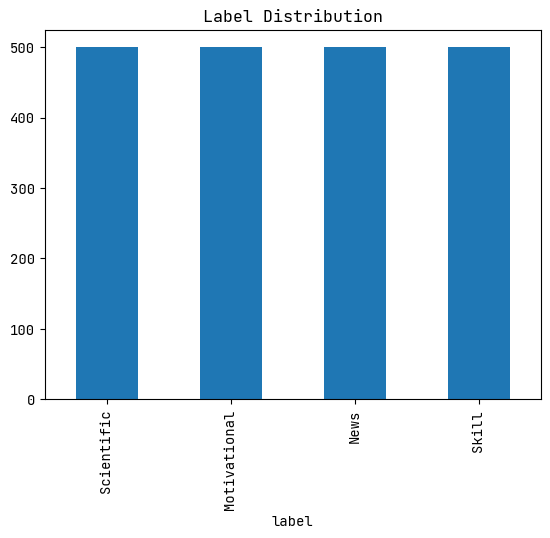

In [7]:
# بررسی تعداد نمونه‌های هر کلاس
df['label'].value_counts()
df['label'].value_counts().plot(kind='bar', title="Label Distribution")
plt.show()

In [8]:
# بررسی طول جملات (character count)
df['char_count'] = df['data'].apply(lambda x: len(str(x)))
df['char_count'].describe()


count    2000.000000
mean       46.763000
std         9.776637
min        19.000000
25%        40.000000
50%        47.000000
75%        53.000000
max        77.000000
Name: char_count, dtype: float64

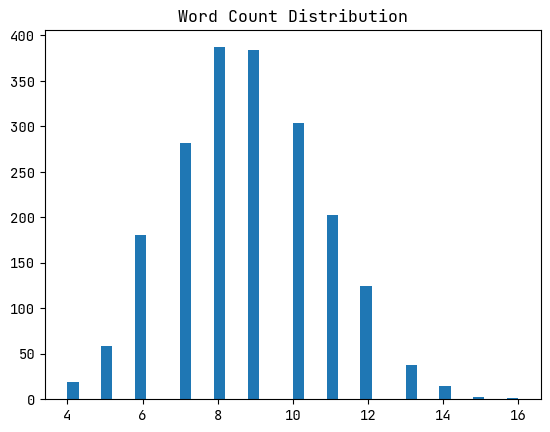

In [9]:
# بررسی تعداد کلمات (word count)
df['word_count'] = df['data'].apply(lambda x: len(str(x).split()))
df['word_count'].describe()
plt.hist(df['word_count'], bins=40)
plt.title("Word Count Distribution")
plt.show()


In [10]:
# نمونه‌هایی از هر کلاس
for label in df['label'].unique():
    print("\n====================")
    print("CLASS:", label)
    print("====================")
    print(df[df['label'] == label]['data'].sample(3, random_state=42).tolist())



CLASS: Scientific
['خاک مرطوب گرمای بیشتری نسبت به خاک خشک جذب می\u200cکند.', 'خط استوا گرم\u200cترین ناحیهٔ کرهٔ زمین است.', 'غلظت نمک در آب دریا نسبت به رودخانه\u200cها بالاتر است.']

CLASS: Motivational
['ذهنیت مثبت داشته باش.', 'آینده\u200cای که می\u200cخواهی با کاری که امروز انجام می\u200cدهی ساخته می\u200cشود.', 'همیشه قدردان مسیر و تلاش خودت باش.']

CLASS: News
['وزیر آموزش از اجرای کلاس\u200cهای مهارتی در مدارس خبر داد.', 'یک کودک از میان آوار ساختمان قدیمی در شیراز نجات یافت.', 'تیم ملی والیبال ساحلی در مسابقات قهرمانی آسیا درخشید.']

CLASS: Skill
['این ویدیو روش پاک\u200cکردن لکه\u200cهای سخت از ظروف را نشان می\u200cدهد.', 'اگر می\u200cخوای طراحی سایت یاد بگیری، HTML و CSS را پایه قرار بده.', 'برای یادگیری بهتر، از فلش\u200cکارت استفاده کن.']


In [11]:
# بررسی وجود ایموجی در متن‌ها
emojis = "😂🤣😅😊🙂😉😁😢😭😡🤬😠😒😐😍❤️💔🔥👍👎🙏👏🤯🤔😴🤮🧠🔬🧪📈📉⚡🌡☀️🌕🌍🧬"

df['has_emoji'] = df['data'].apply(lambda x: any(ch in x for ch in emojis))
df['has_emoji'].mean()


np.float64(0.0)

In [12]:
# بررسی لینک (http یا www)
df['has_link'] = df['data'].str.contains("http|www", regex=True)
df['has_link'].mean()


np.float64(0.0)

In [13]:
# بررسی وجود کلمات انگلیسی
df['has_english'] = df['data'].str.contains(r"[A-Za-z]", regex=True)
df['has_english'].mean()


np.float64(0.0265)

In [14]:
# بررسی اصطلاحات علمی (scientific tokens)
science_terms = ["DNA", "RNA", "CO2", "H2O", "گرانش", "دما", "فشار", "نور", "طیف"]

df['has_science'] = df['data'].apply(lambda x: any(t in x for t in science_terms))
df['has_science'].mean()


np.float64(0.068)

In [15]:
# بررسی نمونه‌هایی از noisy data (اگر وجود داشته باشد)
df[df['has_link'] == True].head()
df[df['has_emoji'] == True].head()
df[df['has_english'] == True].head()


,data,label,char_count,word_count,has_emoji,has_link,has_english,has_science
2,ساختار DNA شامل دو رشته مارپیچی است که اطلاعات...,Scientific,70,13,False,False,True,True
114,عضلات با مصرف ATP منقبض می‌شوند.,Scientific,32,6,False,False,True,False
319,ماهواره‌ها برای تعیین موقعیت از سیگنال‌های GPS...,Scientific,63,9,False,False,True,False
737,پایداری یک superpower واقعی است.,Motivational,32,5,False,False,True,False
1180,شرکت خودروساز داخلی از عرضه مدل جدید SUV خبر داد.,News,49,10,False,False,True,False


# 2. Preprocessing the Dataset

In [16]:
import sys
import os

project_root = os.path.abspath("..")
sys.path.append(project_root)

In [17]:
# ایمپورت preprocessor
from src.preprocessor import PersianPreprocessor
pp = PersianPreprocessor()

In [18]:
# اعمال پردازش روی کل دیتا
df['clean'] = df['data'].apply(pp.preprocess)
df.head()

,data,label,char_count,word_count,has_emoji,has_link,has_english,has_science,clean
0,آب در دمای ۱۰۰ درجه سانتی‌گراد در فشار استاندا...,Scientific,63,12,False,False,False,True,آب در دمای ۱۰۰ درجه سانتی‌گراد در فشار استاندا...
1,نور خورشید ترکیبی از طیف‌های مختلف نور مرئی و ...,Scientific,57,11,False,False,False,True,نور خورشید ترکیبی از طیف‌های مختلف نور مرئی و ...
2,ساختار DNA شامل دو رشته مارپیچی است که اطلاعات...,Scientific,70,13,False,False,True,True,ساختار دی‌ان‌ای شامل دو رشته مارپیچی است که اط...
3,نیروی گرانش باعث می‌شود اجسام همیشه به سمت مرک...,Scientific,64,12,False,False,False,True,نیروی گرانش باعث می‌شود اجسام همیشه به سمت مرک...
4,مغز انسان حدود ۲۰ درصد انرژی کل بدن را مصرف می...,Scientific,51,11,False,False,False,False,مغز انسان حدود ۲۰ درصد انرژی کل بدن را مصرف می...


In [19]:
# بررسی نمونه‌ای از متن خام و متن تمیزشده
df[['data', 'clean']].sample(5, random_state=42)

,data,clean
1860,برای مطالعه مؤثر، ابتدا مرور سریع انجام بده.,برای مطالعه مؤثر، ابتدا مرور سریع انجام بده.
353,گیاهان با تنفس اکسیژن مصرف و دی‌اکسیدکربن تولی...,گیاهان با تنفس اکسیژن مصرف و دی‌اکسیدکربن تولی...
1333,تیم ملی دوچرخه‌سواری مقام دوم آسیایی را کسب کرد.,تیم ملی دوچرخه‌سواری مقام دوم آسیایی را کسب کرد.
905,هیچ‌کس نمی‌تواند جلویت را بگیرد مگر خودت.,هیچ‌کس نمی‌تواند جلویت را بگیرد مگر خودت.
1289,شرکت ملی گاز از احتمال کاهش فشار گاز در زمستان...,شرکت ملی گاز از احتمال کاهش فشار گاز در زمستان...


In [20]:
# بررسی طول متن قبل و بعد
df['clean_word_count'] = df['clean'].apply(lambda x: len(str(x).split()))
df[['word_count', 'clean_word_count']].describe()

,word_count,clean_word_count
count,2000.000000,2000.000000
mean,8.754500,8.756000
std,1.977166,1.977731
min,4.000000,4.000000
25%,7.000000,7.000000
50%,9.000000,9.000000
75%,10.000000,10.000000
max,16.000000,16.000000


In [21]:
# ذخیره نسخه تمیز دیتاست
df.to_csv("../data/clean_dataset.csv", index=False)

# 3. Train/Test Split

In [22]:
# ایمپورت کتابخانه‌های مدل‌سازی
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [23]:
# تقسیم داده به Train و Test
X = df['clean']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # برای حفظ نسبت کلاس‌ها
)


In [24]:
# ساخت TF-IDF
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),    # unigram + bigram
)
tfidf.fit(X_train)
X_train_vec = tfidf.transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [25]:
# تست مدل‌های مختلف Machine Learning
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train_vec, y_train)

y_pred_lr = log_reg.predict(X_test_vec)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Linear SVM
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_vec, y_train)

y_pred_svm = svm.predict(X_test_vec)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred_nb = nb.predict(X_test_vec)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



Logistic Regression Accuracy: 0.9675
              precision    recall  f1-score   support

Motivational       0.97      0.95      0.96       100
        News       0.99      0.95      0.97       100
  Scientific       0.95      0.98      0.97       100
       Skill       0.96      0.99      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

SVM Accuracy: 0.98
              precision    recall  f1-score   support

Motivational       0.99      0.96      0.97       100
        News       0.99      0.98      0.98       100
  Scientific       0.97      0.98      0.98       100
       Skill       0.97      1.00      0.99       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Naive Bayes Accuracy: 0.9775
              precision    recall  f1-score  

In [26]:
from sklearn.metrics import classification_report

# گرفتن نتایج سه مدل
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
nb_report  = classification_report(y_test, y_pred_nb, output_dict=True)

accuracies = {
    "Logistic Regression": lr_report['accuracy'],
    "Naive Bayes": nb_report['accuracy'],
    "SVM": svm_report['accuracy']
}

accuracies


{'Logistic Regression': 0.9675, 'Naive Bayes': 0.9775, 'SVM': 0.98}

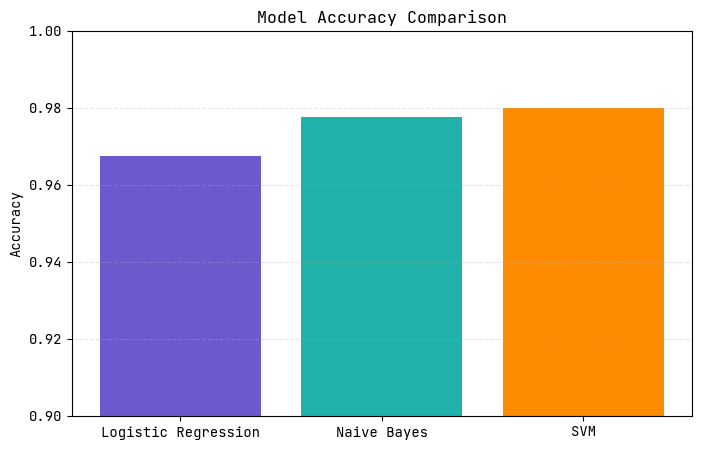

In [27]:
import matplotlib.pyplot as plt

models = list(accuracies.keys())
scores = list(accuracies.values())

plt.figure(figsize=(8,5))
plt.bar(models, scores, color=['#6a5acd','#20b2aa','#ff8c00'])
plt.ylim(0.9, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


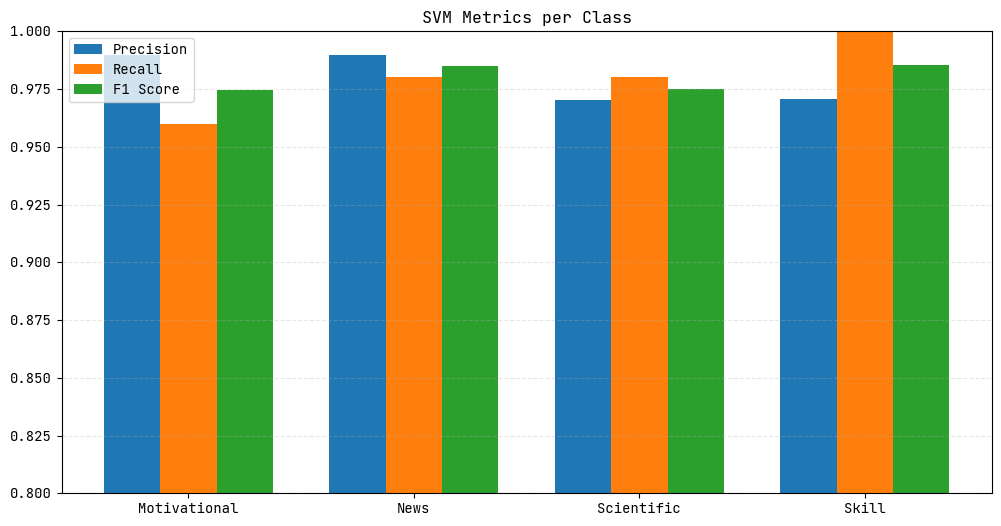

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# استخراج مقادیر کلاس‌ها از report
classes = [cls for cls in svm_report.keys() if cls not in ["accuracy", "macro avg", "weighted avg"]]

precision = [svm_report[cls]['precision'] for cls in classes]
recall    = [svm_report[cls]['recall'] for cls in classes]
f1        = [svm_report[cls]['f1-score'] for cls in classes]

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(12,6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')

plt.xticks(x, classes)
plt.ylim(0.8, 1)
plt.title("SVM Metrics per Class")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


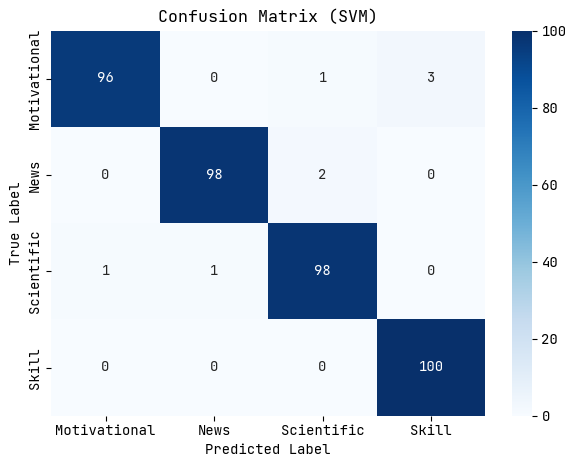

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=svm.classes_,
            yticklabels=svm.classes_)

plt.title("Confusion Matrix (SVM)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [41]:
from src.model import TextClassifier

clf = TextClassifier(
    model_path="../models/svm_model.joblib",
    vectorizer_path="../models/tfidf_vectorizer.joblib"
)

clf.predict("هیچکس اندازه تو توی دنیا زیبا نیست")


'Motivational'